In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [6]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.005)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.005)
    return cheb_high


In [7]:
df = pd.read_csv("delaunay_fast_v1.csv"); df

,N,iterations
0,100,819
1,100,844
2,100,827
3,100,838
4,100,846
...,...,...
99995,10000,111588
99996,10000,111622
99997,10000,111309
99998,10000,111450


# Iteracje

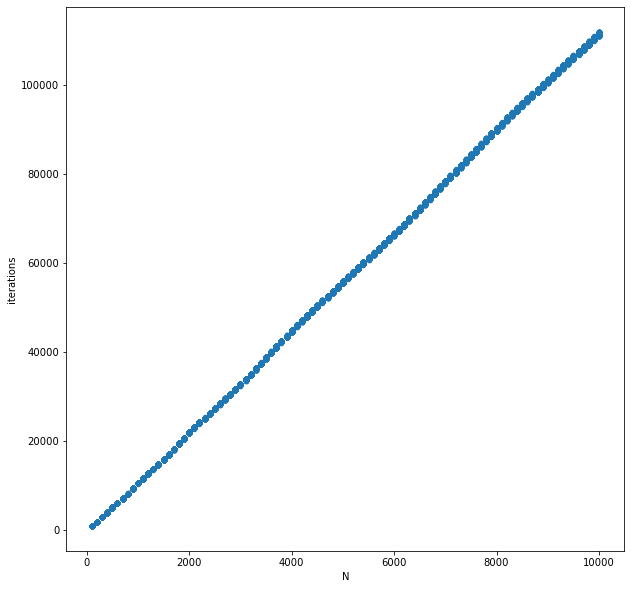

In [9]:
df.plot.scatter(x="N", y="iterations", figsize=(10, 10))

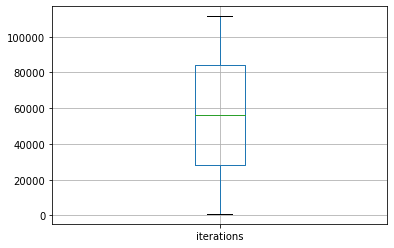

In [10]:
grouped = df.groupby("N")
grouped.mean().boxplot()

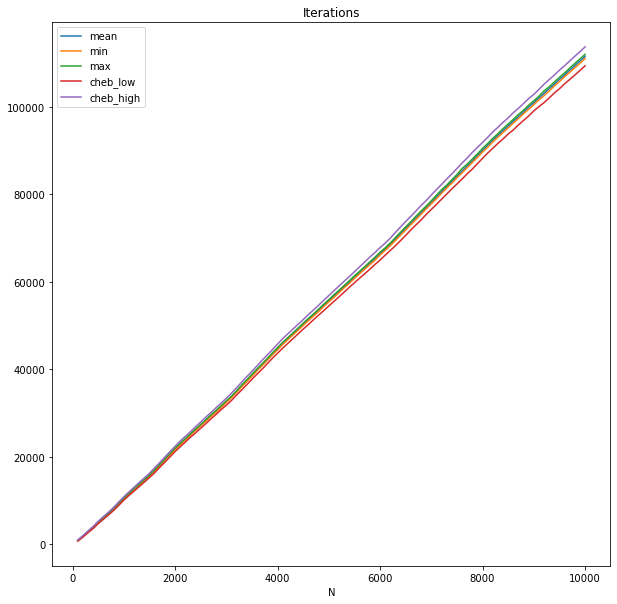

In [11]:
described = grouped["iterations"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.drop(["std"], axis='columns').plot(title="Iterations", figsize=(10,10))